In [1]:
from utils import *

In [2]:
frames = extract_frames('../output_frames/test_Col0_3a_trim.avi')
detected_frames = 0
results = []
for frame in frames:
    centroids, marked_frame = get_red_centroid_threshold(frame, 0.17)
    if centroids:
        results.append(centroids)
    detected_frames+=1
    save_frames(marked_frame,'./test_Col0_3a_trim/threshold_aug')
len(results)

265

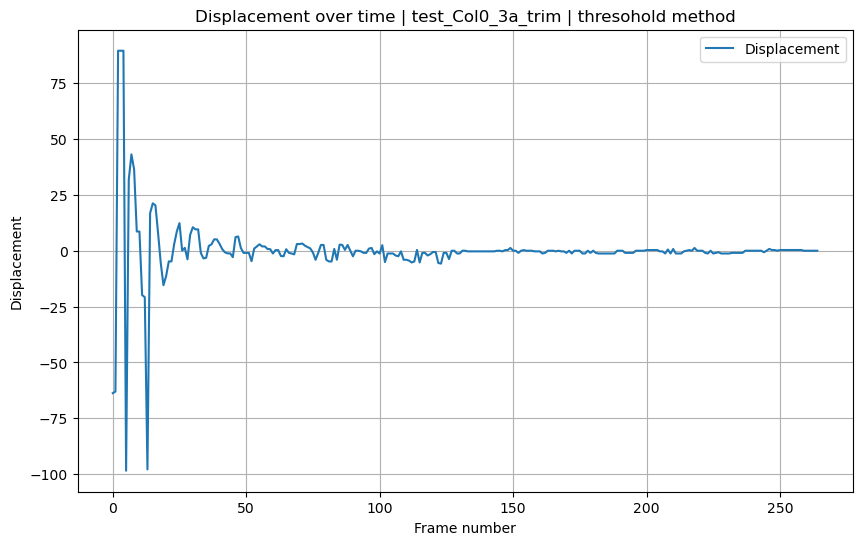

In [3]:
displacement = centroids_to_displacements(results)
plot_displacement(displacement,'test_Col0_3a_trim | thresohold method')

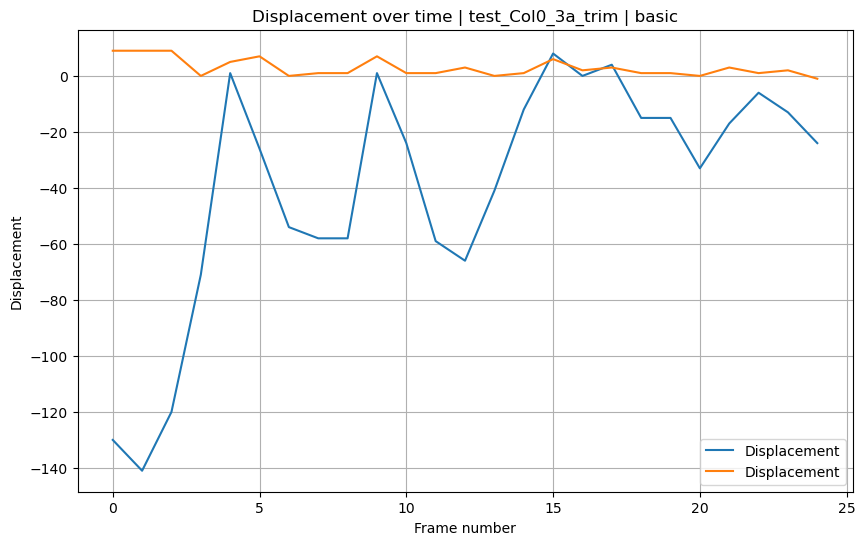

In [4]:
frames = extract_frames('../output_frames/test_Col0_3a_trim.avi')
detected_frames = 0
results = []
for frame in frames:
    centroids, marked_frame = get_centroid_basic(frame)
    if centroids:
        results.append(centroids)
    detected_frames+=1
    #save_frames(marked_frame,'./test_Col0_3a_trim/threshold_aug')
displacement = centroids_to_displacements(results)
plot_displacement(displacement,'test_Col0_3a_trim | basic')

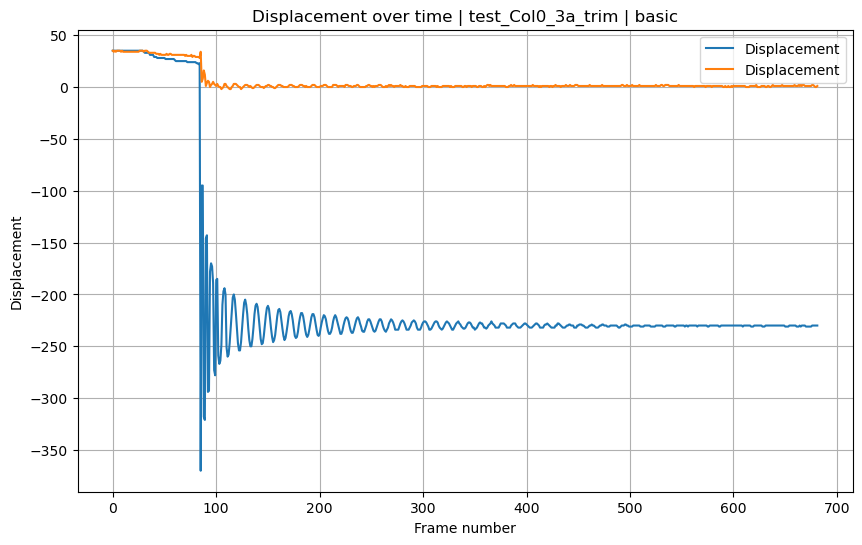

In [5]:
frames = extract_frames('../input_vids/test/Video_1.MP4')
detected_frames = 0
results = []
for frame in frames:
    centroids, marked_frame = get_centroid_basic(frame)
    if centroids:
        results.append(centroids)
    detected_frames+=1
    #save_frames(marked_frame,'./test_Col0_3a_trim/threshold_aug')
displacement = centroids_to_displacements(results)
plot_displacement(displacement,'test_Col0_3a_trim | basic')

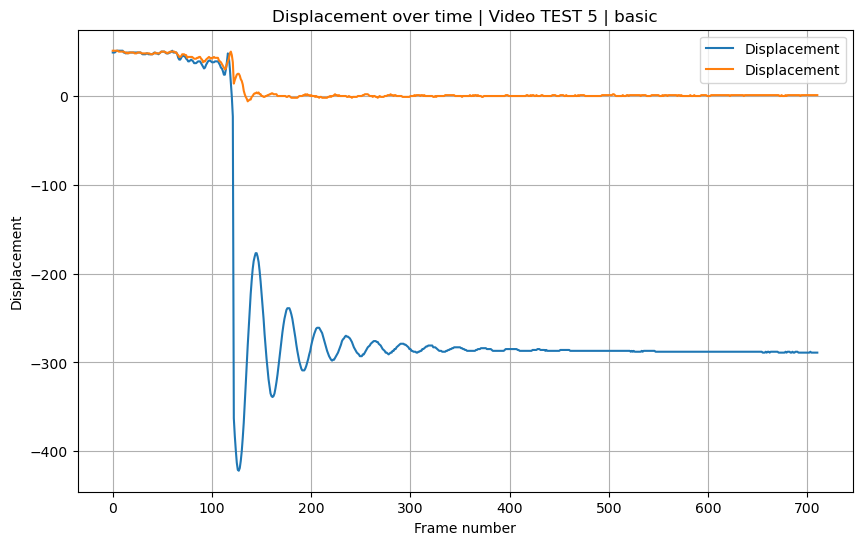

In [6]:
frames = extract_frames('../input_vids/test/Video_5.MP4')
detected_frames = 0
results = []
for frame in frames:
    centroids, marked_frame = get_centroid_basic(frame)
    if centroids:
        results.append(centroids)
    detected_frames+=1
    #save_frames(marked_frame,'./test_Col0_3a_trim/threshold_aug')
displacement = centroids_to_displacements(results)
plot_displacement(displacement,'Video TEST 5 | basic')

In [7]:
#convert to array --> threshold method
results

[[(628, 233)],
 [(628, 233)],
 [(628, 233)],
 [(629, 233)],
 [(630, 233)],
 [(630, 233)],
 [(630, 234)],
 [(630, 234)],
 [(630, 234)],
 [(630, 234)],
 [(630, 234)],
 [(632, 234)],
 [(632, 235)],
 [(633, 235)],
 [(632, 236)],
 [(633, 235)],
 [(632, 236)],
 [(632, 235)],
 [(632, 235)],
 [(632, 235)],
 [(632, 235)],
 [(632, 235)],
 [(632, 236)],
 [(632, 236)],
 [(632, 236)],
 [(632, 235)],
 [(632, 235)],
 [(632, 235)],
 [(632, 235)],
 [(633, 236)],
 [(634, 236)],
 [(634, 236)],
 [(634, 236)],
 [(634, 236)],
 [(633, 236)],
 [(633, 236)],
 [(634, 236)],
 [(634, 236)],
 [(634, 237)],
 [(634, 237)],
 [(634, 237)],
 [(633, 236)],
 [(632, 236)],
 [(633, 235)],
 [(633, 236)],
 [(633, 236)],
 [(634, 236)],
 [(633, 236)],
 [(632, 235)],
 [(631, 234)],
 [(631, 234)],
 [(631, 234)],
 [(631, 234)],
 [(632, 235)],
 [(633, 235)],
 [(633, 236)],
 [(633, 235)],
 [(632, 235)],
 [(632, 234)],
 [(631, 234)],
 [(630, 234)],
 [(632, 234)],
 [(632, 234)],
 [(632, 235)],
 [(632, 235)],
 [(634, 237)],
 [(638, 23

In [8]:
import cv2
import os
import numpy as np



#can you use the tqdm python library into the function you gave me to print the advance of the function ? 
def process_video(video_path, output_folder, tolerance=0.2, max_distance=3):
    # Open the video
    cap = cv2.VideoCapture(video_path)
    
    # Check if video opened successfully
    if not cap.isOpened():
        print("Error: Could not open video.")
        return
    
    # Frame number counter
    frame_num = 0
    
    # List to store the processed frames
    processed_frames = []
    
    # Variables to store the previous frame and centroid
    prev_frame = None
    prev_centroid = None
    
    # Process the video frame by frame
    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()
        
        # Break the loop if we reach the end of the video
        if not ret:
            break
        
        # Apply the get_red_centroid_threshold function to get the centroid
        centroid, marked_frame = get_red_centroid_threshold(frame, tolerance, prev_centroid)
        
        # If the centroid was not found, and we have a previous centroid, apply ORB technique
        if not centroid and prev_centroid is not None:
            # Get features near the previous centroid
            keypoints, descriptors = get_features_near_centroid(prev_frame, prev_centroid, max_distance)
            
            # Compute the centroid from keypoints
            centroid = compute_centroid_of_keypoints(keypoints)
            
            # Draw a circle at the new centroid if it was found
            if centroid:
                marked_frame = cv2.circle(marked_frame, (int(centroid[0]), int(centroid[1])), 15, (0, 255, 0), 3)
                
        # Append the processed frame to the list
        processed_frames.append(marked_frame)
        
        # Update the previous frame and centroid
        prev_frame = frame
        prev_centroid = centroid
        
        # Increment frame number
        frame_num += 1
    
    # Release the video capture object
    cap.release()
    
    # Save the processed frames to the output folder
    save_frames(processed_frames, output_folder)


In [9]:
# Example usage
centroids = process_video('../output_frames/test_Col0_3a_trim.avi','./test_Col0_3a_trim/orb_augmentation')

In [10]:
def get_red_centroid(frame, use_preprocessing=False, use_noise_reduction=False):
    # Convert the frame to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Define the lower and upper bounds of the "red" color in the HSV color space
    # Note: the Hue value for red can be near 0 or near 180 in the HSV color space, 
    # so we need to define two ranges and combine them
    lower_red_1 = np.array([0, 100, 100])
    upper_red_1 = np.array([10, 255, 255])
    lower_red_2 = np.array([170, 100, 100])
    upper_red_2 = np.array([180, 255, 255])

    # Create a mask for the red color
    mask_1 = cv2.inRange(hsv, lower_red_1, upper_red_1)
    mask_2 = cv2.inRange(hsv, lower_red_2, upper_red_2)
    mask = cv2.bitwise_or(mask_1, mask_2)
    
    # Apply image preprocessing
    if use_preprocessing:
        kernel = np.ones((5,5),np.uint8)
        mask = cv2.dilate(mask,kernel,iterations = 1)
        mask = cv2.erode(mask,kernel,iterations = 1)

    # Apply noise reduction
    if use_noise_reduction:
        mask = cv2.medianBlur(mask, 5)
    
    # Compute the moments of the mask image
    moments = cv2.moments(mask)
    area = moments['m00']

    # If the area is zero, return None (no red detected)
    if area == 0:
        return None

    # Compute the centroid
    cx = int(moments['m10'] / area)
    cy = int(moments['m01'] / area)

    return (cx, cy)


In [52]:
def get_red_centroid_previous(frame, prev_centroid=None):
    # Convert the frame to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Define the lower and upper bounds of the "red" color in the HSV color space
    # Note: the Hue value for red can be near 0 or near 180 in the HSV color space, 
    # so we need to define two ranges and combine them
    lower_red_1 = np.array([0, 100, 100])
    upper_red_1 = np.array([10, 255, 255])
    lower_red_2 = np.array([170, 100, 100])
    upper_red_2 = np.array([180, 255, 255])

    # Create a mask for the red color
    mask_1 = cv2.inRange(hsv, lower_red_1, upper_red_1)
    mask_2 = cv2.inRange(hsv, lower_red_2, upper_red_2)
    mask = cv2.bitwise_or(mask_1, mask_2)

    # Find contours in the mask
    contours, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Compute the centroids of each contour and store them in a list
    red_centroids = []
    for contour in contours:
        M = cv2.moments(contour)
        if M["m00"] != 0:  # check for division by zero
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
            red_centroids.append((cx, cy))

    # If there is a previous centroid, find the closest current centroid to it
    if prev_centroid is not None and len(red_centroids) > 0:
        distances = [np.linalg.norm(np.array(centroid) - np.array(prev_centroid)) for centroid in red_centroids]
        closest_centroid = red_centroids[np.argmin(distances)]
    elif len(red_centroids) > 0:  # No previous centroid, find the largest contour
        c = max(contours, key=cv2.contourArea)
        M = cv2.moments(c)
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        closest_centroid = (cx, cy)
    else:
        closest_centroid = None

    return closest_centroid


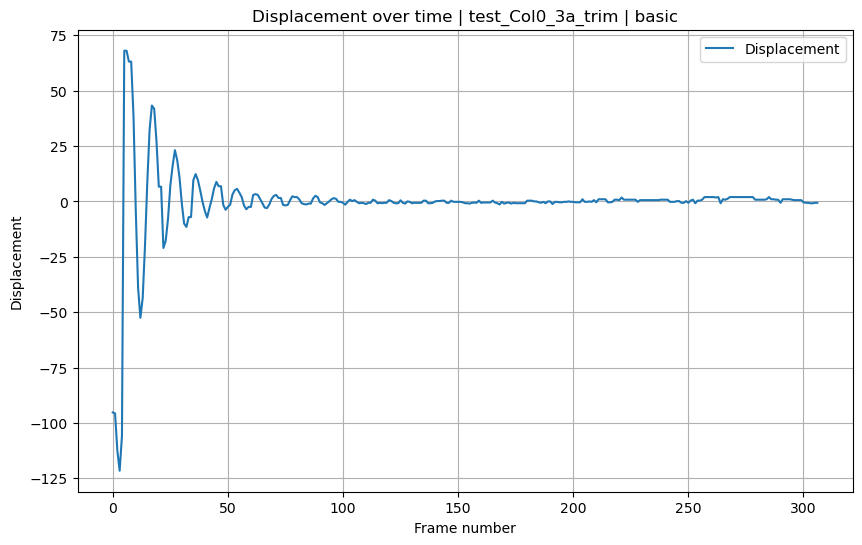

In [53]:
frames = extract_frames('../output_frames/test_Col0_3a_trim.avi')
detected_frames = 0
results = []
for frame in frames:
    centroids = get_red_centroid(frame)
    if centroids:
        results.append(centroids)
    detected_frames+=1
    #save_frames(marked_frame,'./test_Col0_3a_trim/threshold_aug')
displacement = centroids_to_displacements(results)
plot_displacement(displacement,'test_Col0_3a_trim | basic')

In [54]:
len(results), len(frames)

(307, 312)

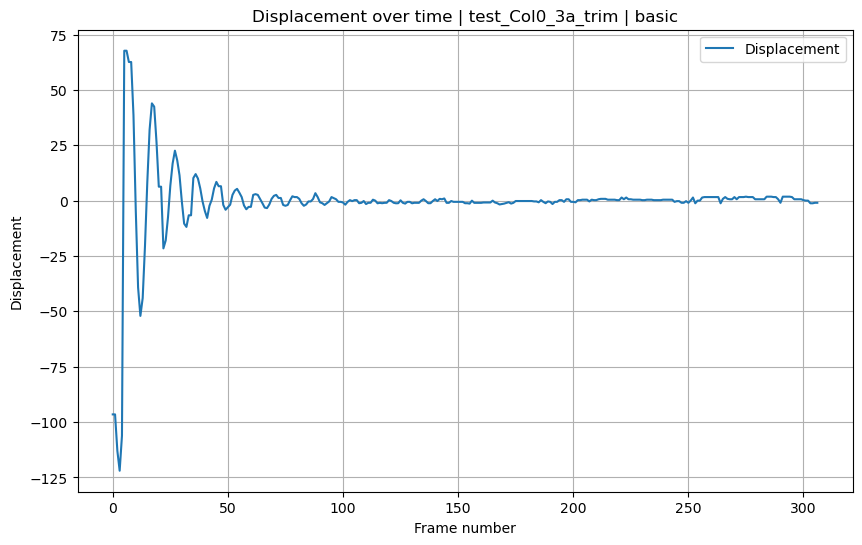

In [55]:
frames = extract_frames('../output_frames/test_Col0_3a_trim.avi')
detected_frames = 0
results = []
for frame in frames:
    centroids = get_red_centroid(frame,True,False)
    if centroids:
        results.append(centroids)
    detected_frames+=1
    #save_frames(marked_frame,'./test_Col0_3a_trim/threshold_aug')
displacement = centroids_to_displacements(results)
plot_displacement(displacement,'test_Col0_3a_trim | basic')

In [56]:
len(results), len(frames)

(307, 312)

In [59]:
dif_array1, start_point1 = displacement_to_difference(displacement)
try : 
    hanning_array1 = transform_hanning_adapt(displacement, start_point1)
except:
    hanning_array1 = transform_hanning(displacement, start_point1)

freqs1, power1, major_freq1 = displacement_to_major_freq(hanning_array1)
major_freq1

array([27.36156352])

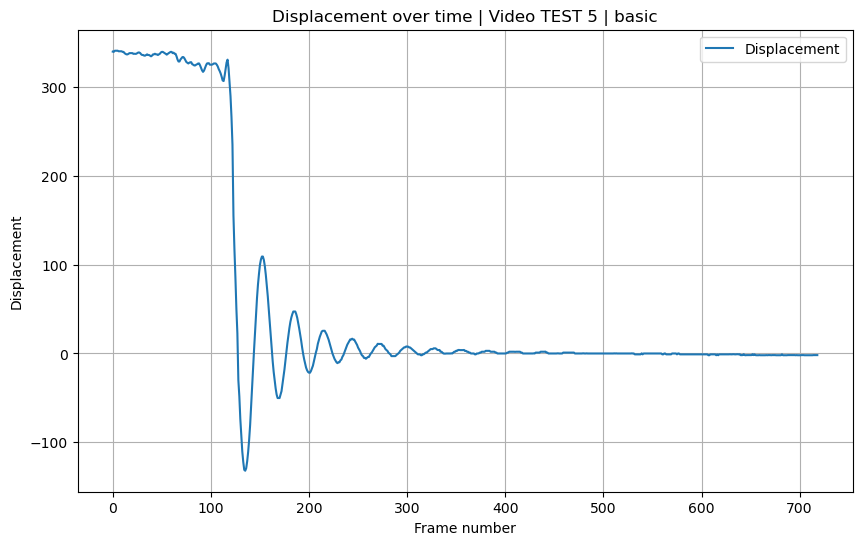

In [77]:
frames = extract_frames('../input_vids/test/Video_5.MP4')
detected_frames = 0
results = []
for frame in frames:
    centroids = get_red_centroid(frame)
    if centroids:
        results.append(centroids)
    detected_frames+=1
    #save_frames(marked_frame,'./test_Col0_3a_trim/threshold_aug')
displacement = centroids_to_displacements(results)
plot_displacement(displacement,'Video TEST 5 | basic')

In [79]:
dif_array1, start_point1 = displacement_to_difference(displacement)
hanning_array1 = transform_hanning(displacement, start_point1)
freqs1, power1, major_freq1 = displacement_to_major_freq(hanning_array1)
major_freq1

array([8.3449235])

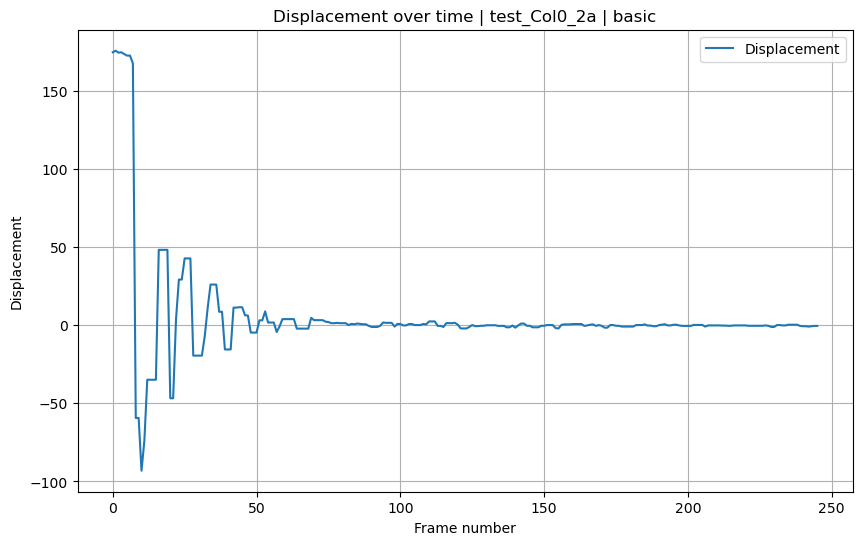

In [61]:
frames = extract_frames('../output_frames/test_Col0_2a_trim.avi')
detected_frames = 0
results = []
for frame in frames:
    centroids = get_red_centroid(frame,False, False)
    if centroids:
        results.append(centroids)
    detected_frames+=1
    #save_frames(marked_frame,'./test_Col0_3a_trim/threshold_aug')
displacement = centroids_to_displacements(results)
plot_displacement(displacement,'test_Col0_2a | basic')

In [62]:
len(results), len(frames)

(246, 248)

In [63]:
dif_array1, start_point1 = displacement_to_difference(displacement)
hanning_array1 = transform_hanning_adapt(displacement, start_point1)
freqs1, power1, major_freq1 = displacement_to_major_freq(hanning_array1)
major_freq1

array([26.34146341])

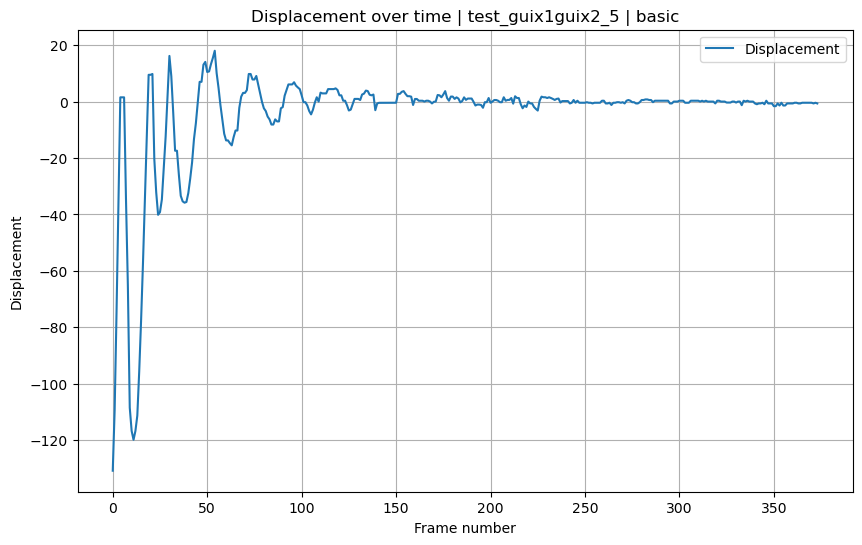

In [73]:
frames = extract_frames('../output_frames/test_guix1guix2_5_trim.avi')
detected_frames = 0
results = []
for frame in frames:
    centroids = get_red_centroid(frame,True,False)
    if centroids:
        results.append(centroids)
    detected_frames+=1
    #save_frames(marked_frame,'./test_Col0_3a_trim/threshold_aug')
displacement = centroids_to_displacements(results)
plot_displacement(displacement,'test_guix1guix2_5 | basic')

In [74]:
len(results), len(frames)

(374, 382)

In [75]:
dif_array1, start_point1 = displacement_to_difference(displacement)
hanning_array1 = transform_hanning_adapt(displacement, start_point1)
freqs1, power1, major_freq1 = displacement_to_major_freq(hanning_array1)

In [76]:
major_freq1

array([12.19251337])

In [68]:
top_percentage = 0.6
right_percentage = 0.98
input_vid = '../input_vids/gux1gux2_164216.mp4'
output_vid = '../output_frames/test_guix1guix2_164216_trim.avi'
crop_video(input_vid,output_vid,top_percentage,right_percentage)

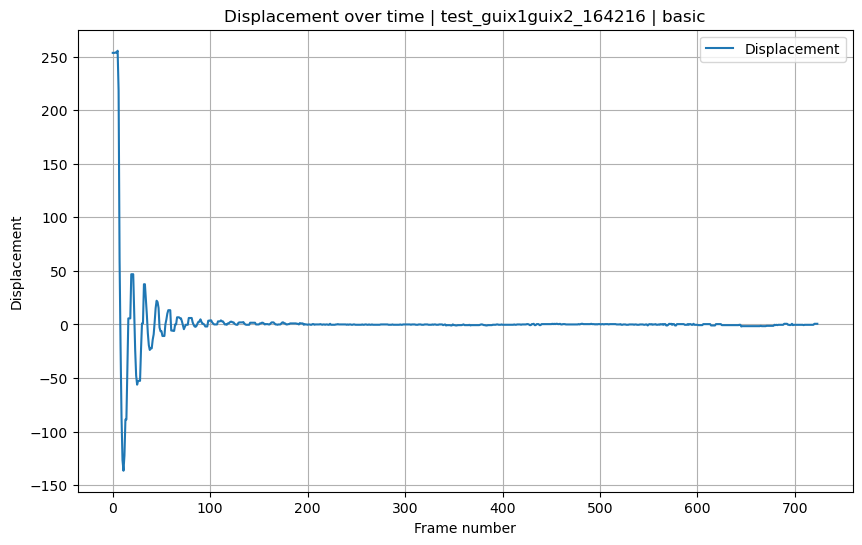

In [80]:
frames = extract_frames(output_vid)
detected_frames = 0
results = []
for frame in frames:
    centroids = get_red_centroid(frame,True,False)
    if centroids:
        results.append(centroids)
    detected_frames+=1
    #save_frames(marked_frame,'./test_Col0_3a_trim/threshold_aug')
displacement = centroids_to_displacements(results)
plot_displacement(displacement,'test_guix1guix2_164216 | basic')

In [81]:
len(results), len(frames)

(724, 724)

In [82]:
dif_array1, start_point1 = displacement_to_difference(displacement)
hanning_array1 = transform_hanning_adapt(displacement, start_point1)
freqs1, power1, major_freq1 = displacement_to_major_freq(hanning_array1)

In [83]:
major_freq1

array([2.32044199])

In [85]:
dif_array1, start_point1 = displacement_to_difference(displacement)
hanning_array1 = transform_hanning(displacement, start_point1)
freqs1, power1, major_freq1 = displacement_to_major_freq(hanning_array1)
major_freq1

array([22.20994475])

In [86]:
top_percentage = 0.6
right_percentage = 0.98
input_vid = '../input_vids/gux1gux2 181618.mp4'
output_vid = '../output_frames/test_guix1guix2_181618_trim.avi'
crop_video(input_vid,output_vid,top_percentage,right_percentage)

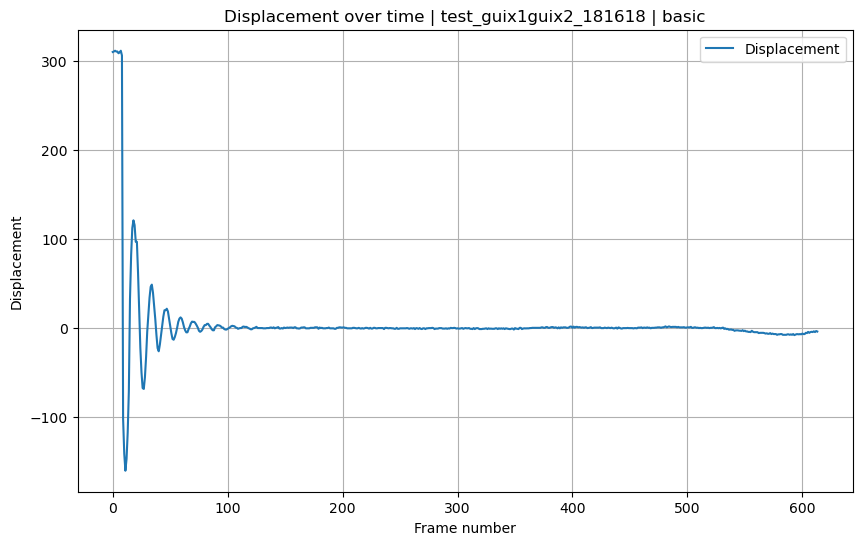

(614, 618)

In [90]:
frames = extract_frames(output_vid)
detected_frames = 0
results = []
for frame in frames:
    centroids = get_red_centroid(frame,True,False)
    if centroids:
        results.append(centroids)
    detected_frames+=1
    #save_frames(marked_frame,'./test_Col0_3a_trim/threshold_aug')
displacement = centroids_to_displacements(results)
plot_displacement(displacement,'test_guix1guix2_181618 | basic')
len(results), len(frames)

In [88]:
dif_array1, start_point1 = displacement_to_difference(displacement)
hanning_array1 = transform_hanning(displacement, start_point1)
freqs1, power1, major_freq1 = displacement_to_major_freq(hanning_array1)
major_freq1

array([2.34527687])

In [89]:
dif_array1, start_point1 = displacement_to_difference(displacement)
hanning_array1 = transform_hanning_adapt(displacement, start_point1)
freqs1, power1, major_freq1 = displacement_to_major_freq(hanning_array1)
major_freq1

array([2.73615635])

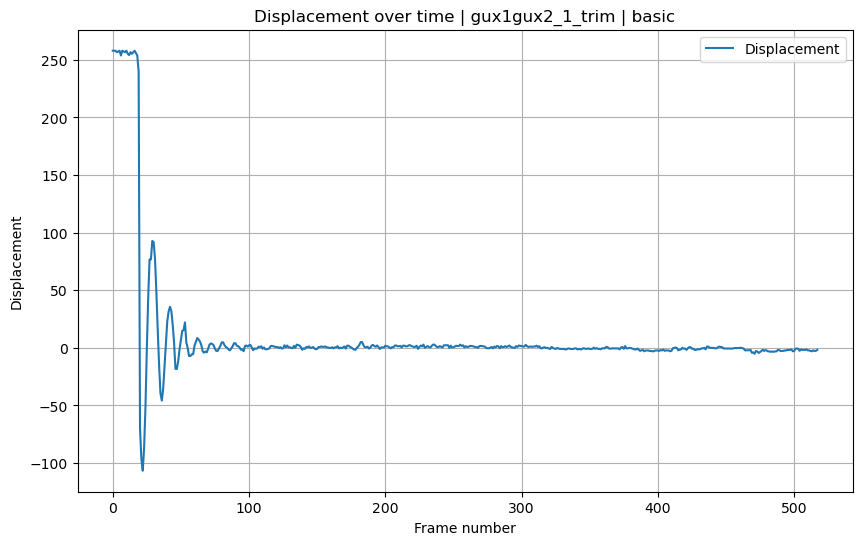

(518, 521)

In [113]:
top_percentage = 0.6
right_percentage = 0.98
input_vid = '../input_vids/gux1gux2_1.mp4'
output_vid = '../output_frames/gux1gux2_1_trim.avi'
crop_video(input_vid,output_vid,top_percentage,right_percentage)
frames = extract_frames(output_vid)
detected_frames = 0
results = []
for frame in frames:
    centroids = get_red_centroid(frame,True,False)
    if centroids:
        results.append(centroids)
    detected_frames+=1
    #save_frames(marked_frame,'./test_Col0_3a_trim/threshold_aug')
displacement = centroids_to_displacements(results)
plot_displacement(displacement,'gux1gux2_1_trim | basic')
len(results), len(frames)

In [114]:
dif_array1, start_point1 = displacement_to_difference(displacement)
hanning_array1 = transform_hanning(displacement, start_point1)
freqs1, power1, major_freq1 = displacement_to_major_freq(hanning_array1)
major_freq1

array([26.40926641])

In [115]:
dif_array1, start_point1 = displacement_to_difference(displacement)
hanning_array1 = transform_hanning_adapt(displacement, start_point1)
freqs1, power1, major_freq1 = displacement_to_major_freq(hanning_array1)
major_freq1

array([26.87258687])

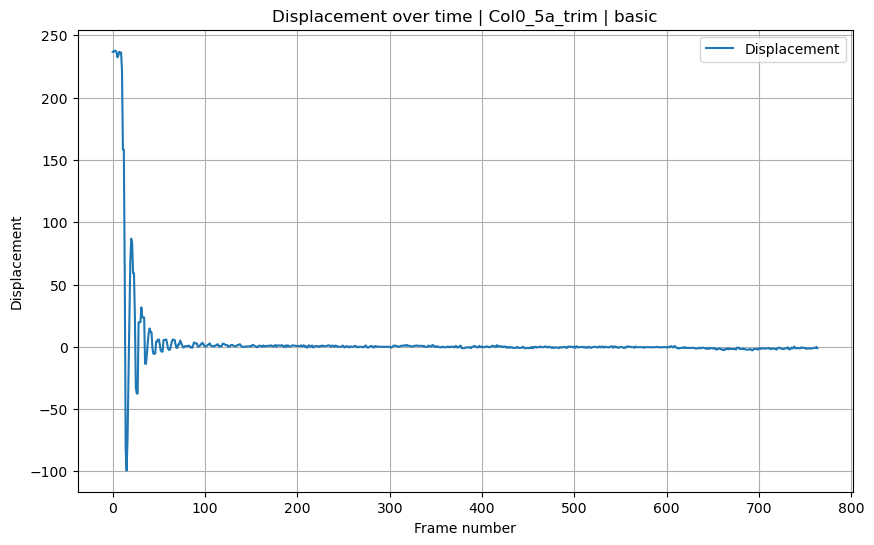

(764, 764)

In [103]:
top_percentage = 0.6
right_percentage = 0.98
input_vid = '../input_vids/Col0 5a.mp4'
output_vid = '../output_frames/Col0_5a_trim.avi'
crop_video(input_vid,output_vid,top_percentage,right_percentage)
frames = extract_frames(output_vid)
detected_frames = 0
results = []
for frame in frames:
    centroids = get_red_centroid(frame,True,False)
    if centroids:
        results.append(centroids)
    detected_frames+=1
    #save_frames(marked_frame,'./test_Col0_3a_trim/threshold_aug')
displacement = centroids_to_displacements(results)
plot_displacement(displacement,'Col0_5a_trim | basic')
len(results), len(frames)

In [104]:
dif_array1, start_point1 = displacement_to_difference(displacement)
hanning_array1 = transform_hanning_adapt(displacement, start_point1)
freqs1, power1, major_freq1 = displacement_to_major_freq(hanning_array1)
major_freq1

array([2.82722513])

In [105]:
dif_array1, start_point1 = displacement_to_difference(displacement)
hanning_array1 = transform_hanning(displacement, start_point1)
freqs1, power1, major_freq1 = displacement_to_major_freq(hanning_array1)
major_freq1


array([2.51308901])

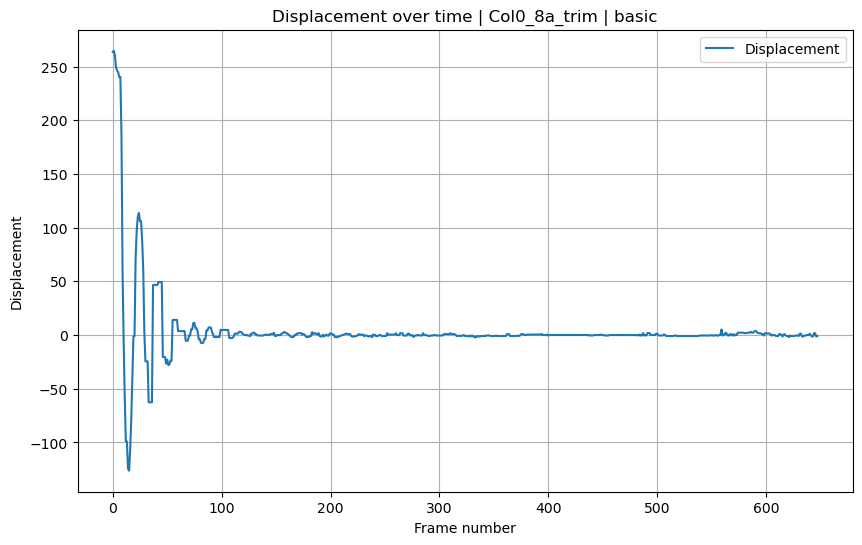

(648, 648)

In [112]:
top_percentage = 0.6
right_percentage = 0.98
input_vid = '../input_vids/Col0 8a.mp4'
output_vid = '../output_frames/Col0_8a_trim.avi'
crop_video(input_vid,output_vid,top_percentage,right_percentage)
frames = extract_frames(output_vid)
detected_frames = 0
results = []
for frame in frames:
    centroids = get_red_centroid(frame,True,False)
    if centroids:
        results.append(centroids)
    detected_frames+=1
    #save_frames(marked_frame,'./test_Col0_3a_trim/threshold_aug')
displacement = centroids_to_displacements(results)
plot_displacement(displacement,'Col0_8a_trim | basic')
len(results), len(frames)

## 🚧 weird ... se why values are so different between `transform_hanning_adapt` & `transform_hanning`

In [107]:
dif_array1, start_point1 = displacement_to_difference(displacement)
hanning_array1 = transform_hanning_adapt(displacement, start_point1)
freqs1, power1, major_freq1 = displacement_to_major_freq(hanning_array1)
major_freq1

array([2.22222222])

In [108]:
dif_array1, start_point1 = displacement_to_difference(displacement)
hanning_array1 = transform_hanning(displacement, start_point1)
freqs1, power1, major_freq1 = displacement_to_major_freq(hanning_array1)
major_freq1



array([17.40740741])

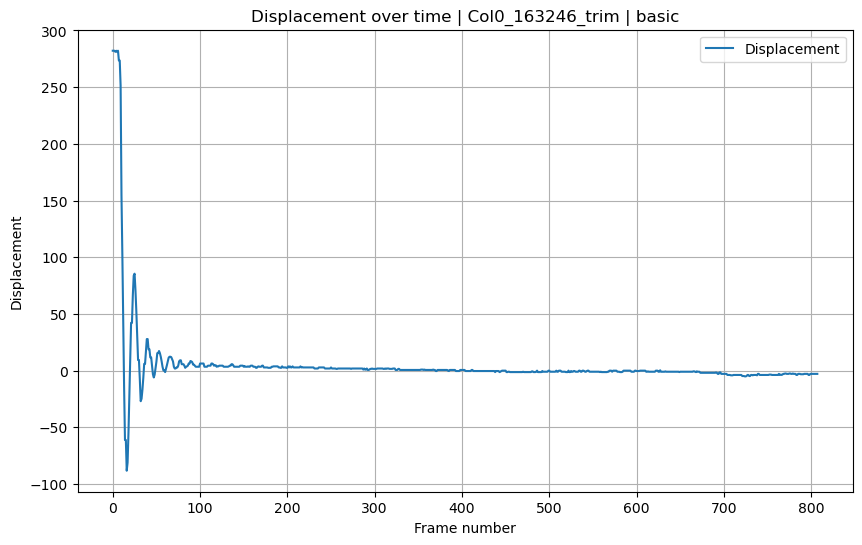

(808, 808)

In [109]:
top_percentage = 0.6
right_percentage = 0.98
input_vid = '../input_vids/Col0 163246.mp4'
output_vid = '../output_frames/Col0_163246_trim.avi'
crop_video(input_vid,output_vid,top_percentage,right_percentage)
frames = extract_frames(output_vid)
detected_frames = 0
results = []
for frame in frames:
    centroids = get_red_centroid(frame,True,False)
    if centroids:
        results.append(centroids)
    detected_frames+=1
    #save_frames(marked_frame,'./test_Col0_3a_trim/threshold_aug')
displacement = centroids_to_displacements(results)
plot_displacement(displacement,'Col0_163246_trim | basic')
len(results), len(frames)

In [110]:
dif_array1, start_point1 = displacement_to_difference(displacement)
hanning_array1 = transform_hanning_adapt(displacement, start_point1)
freqs1, power1, major_freq1 = displacement_to_major_freq(hanning_array1)
major_freq1

array([2.07920792])

In [111]:
dif_array1, start_point1 = displacement_to_difference(displacement)
hanning_array1 = transform_hanning(displacement, start_point1)
freqs1, power1, major_freq1 = displacement_to_major_freq(hanning_array1)
major_freq1

array([20.79207921])

# Add ML tracking 

In [25]:
def compute_centroid_with_dbscan(keypoints, prev_centroid=None, max_distance=3, eps=3, min_samples=2):
    # Prepare data
    points = np.array([kp.pt for kp in keypoints])

    # Check if keypoints are available
    if len(points) == 0:
        print("No keypoints detected. Returning None as the centroid.")
        return None

    # If previous centroid is provided and max_distance is specified,
    # only keep points within max_distance of prev_centroid
    if prev_centroid is not None and max_distance is not None:
        distances = np.sqrt((points[:, 0] - prev_centroid[0])**2 + (points[:, 1] - prev_centroid[1])**2)
        points = points[distances <= max_distance]

    # Apply DBSCAN clustering
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(points)

    # Find the label of the largest cluster
    labels, counts = np.unique(clustering.labels_, return_counts=True)
    largest_cluster_label = labels[np.argmax(counts)]

    # Calculate the centroid of the largest cluster
    largest_cluster_points = points[clustering.labels_ == largest_cluster_label]
    centroid = np.mean(largest_cluster_points, axis=0)

    return centroid


In [26]:
def process_video_ml(video_path, output_folder, tolerance=0.5, max_distance=3):
    # Open the video
    cap = cv2.VideoCapture(video_path)
    
    # Check if video opened successfully
    if not cap.isOpened():
        print("Error: Could not open video.")
        return
    
    # Frame number counter
    frame_num = 0
    
    # List to store the processed frames
    processed_frames = []
    centroids = []

    # Variables to store the previous frame and centroid
    prev_frame = None
    prev_centroid = None
    
    # Process the video frame by frame
    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()
        
        # Break the loop if we reach the end of the video
        if not ret:
            break
        
        # Apply the get_red_centroid_threshold function to get the centroid
        centroid, marked_frame = get_red_centroid_threshold(frame, tolerance, prev_centroid)
        
        #add ml to reduce noise 
        if frame_num != 0:
            centroid = compute_centroid_with_dbscan(keypoints, prev_centroid, max_distance)

        # If the centroid was not found, and we have a previous centroid, apply ORB technique
        if not centroid and prev_centroid is not None:
            # Get features near the previous centroid
            keypoints, descriptors = get_features_near_centroid(prev_frame, prev_centroid, max_distance)
            
            # Compute the centroid from keypoints
            centroid = compute_centroid_of_keypoints(keypoints)
            
            # Draw a circle at the new centroid if it was found
            if centroid:
                centroids.append(centroid)
                marked_frame = cv2.circle(marked_frame, (int(centroid[0]), int(centroid[1])), 15, (0, 255, 0), 3)
                
        # Append the processed frame to the list
        processed_frames.append(marked_frame)
        
        # Update the previous frame and centroid
        prev_frame = frame
        prev_centroid = centroid
        
        # Increment frame number
        frame_num += 1
    
    # Release the video capture object
    cap.release()
    
    # Save the processed frames to the output folder
    save_frames(processed_frames, output_folder)
    
    return centroids





In [27]:
centroids = process_video('../output_frames/test_Col0_3a_trim.avi','./test_Col0_3a_trim/ml_augmentation')

In [28]:
centroids